In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np 
sys.path.append('../')

from utils.get_data import fetch_housing_data, HOUSING_PATH

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Conhecendo um pouco do Dataset

In [2]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


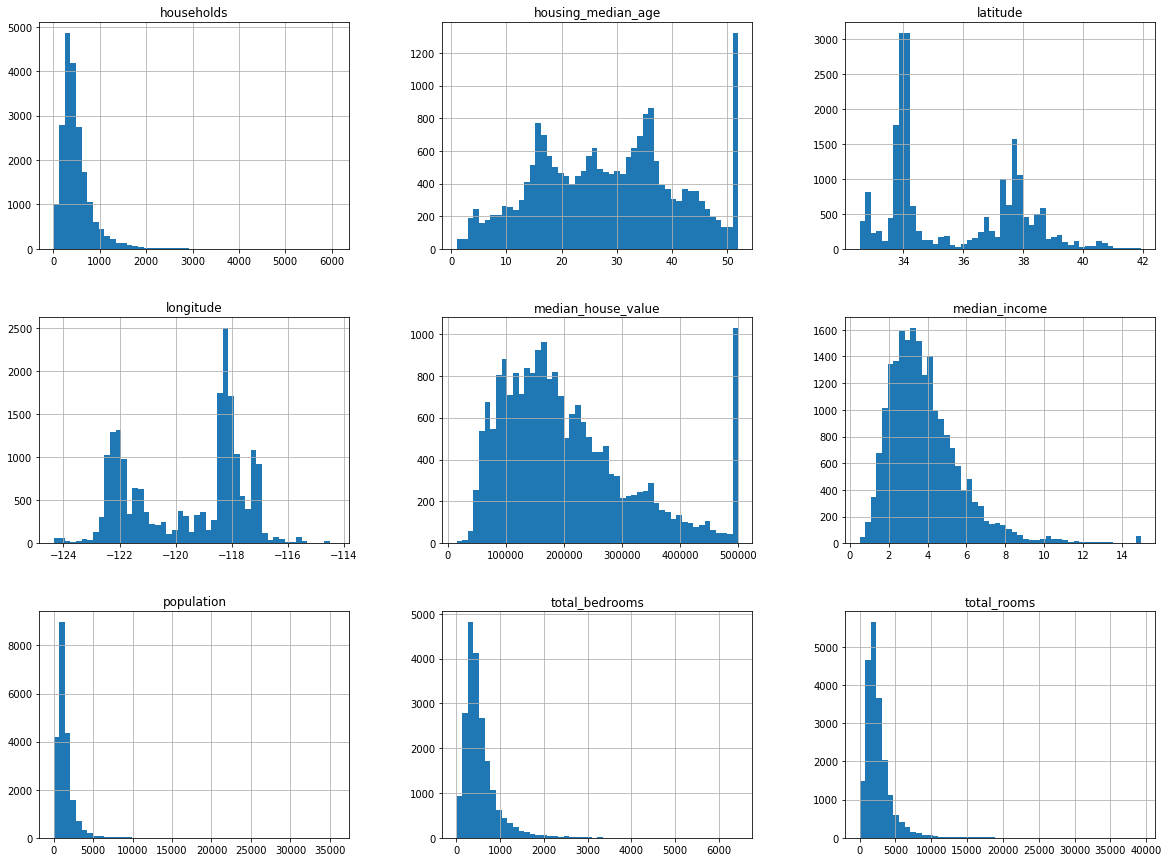

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2)

In [7]:
# ???
housing['incoming_cat'] = np.ceil(housing["median_income"]/1.5)
housing['incoming_cat'].where(housing['incoming_cat'] < 5, 5.0, inplace = True)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["incoming_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["incoming_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: incoming_cat, dtype: float64

In [9]:
# remoção do atributo incoming_cat:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("incoming_cat", axis=1, inplace=True)

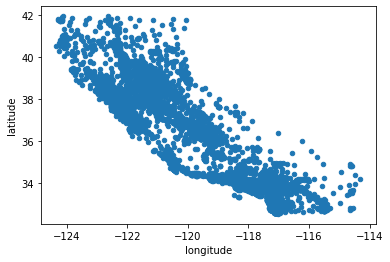

In [10]:
# Ploto algumas informações
housing.plot(kind='scatter', x='longitude', y='latitude')

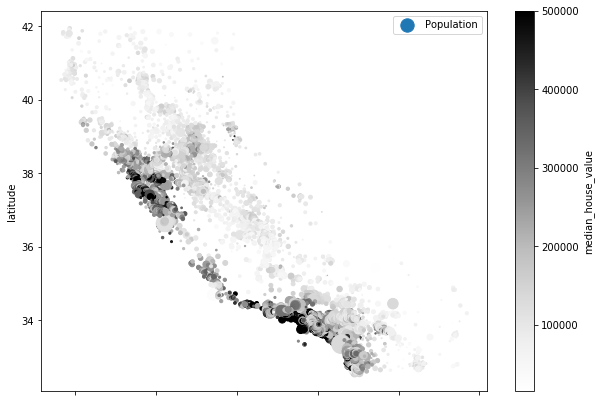

In [11]:
housing.plot(kind='scatter', x='longitude', y='latitude',
    s=housing["population"]/100, label="Population", figsize=(10,7),
    c="median_house_value",  colorbar=True
)

In [12]:
# Coeficiente de correlação
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
incoming_cat          0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Preparando os dados

In [13]:
# revertendo os dados par um conjunto de treinamento limpo

# Housing passa a ser um novo dataset sem median_house_value
housing = strat_train_set.drop("median_house_value", axis=1)

# Housing_labels contém somente o valor médio das casas
housing_labels = strat_train_set["median_house_value"].copy()

In [14]:
# Limpando os dados que contém  características faltantes
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer # => novas versões

# A estratégia median irá substituir valores faltantes pela média do atributo
imputer = SimpleImputer(strategy="median")

# Como a média só pode ser calculada em valores numéricos, iremos remover o atributo de texto ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [15]:
x = imputer.transform(housing_num)

housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [16]:
# O atributo ocean_proximity não é numérico, porém podemos convertê-lo para trabalhar de forma numérica com ele:

housing_cat = housing["ocean_proximity"]

# Mapeamos as categorias para numeros inteiros usando o factorize()
housing_cat_encoded, housing_categories = housing_cat.factorize()

# Housing cat encoded passa a ser puramente numérico
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [17]:
 # E podemos também ver as categorias relacionadas, visto que factorize() também retorna elas:
housing_categories[:10]

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [18]:
"""
Porém como alguns algoritmos de Aprendizado de máquina podem considerar os valores inteiros como distâncias, 
devemos categorizar de forma booleana as entradas. Por exemplo, Ao invés de mapear 'NEAR OCEAN' para 1, podemos
dizer que o atributo está ou não presente (0 ou 1). Para isso utilizaremos um one-hot enconded
"""

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Como housing_cat_encoded é um array 2d e o fit_transform espera um array 1d, fazemos o reshape dele.
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

housing_cat_1hot

# Todo o passo acima, de In 20 a in 24 pode ser feito diretamente com o CategoricalEncoder.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Transformadores & pipelines


In [19]:
"""
O scikit learn permite a construção de transformadores customizados. Podemos, por exemplo, criar um 
transformador para adicionar automaticamente os atributos criados manualmente anteriormente:
"""

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else: 
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)


# Fazemos ainda um transformer para gerar um DataFrame do pandas a partir de um array np:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    
"""
E utilizaremos um pipeline para a execução correta das sequências de transformações:
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


# Pipeline numérico
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Pipeline de categorias
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', OneHotEncoder()), # Deveria ser CategoricalEncoder, mas foi descontinuado
])

# União de ambos pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

## Treinando e avaliando o conjunto de treinamento

In [20]:
"""
Após ser feito um trabalho inicial com os dados, podemos começar a treinar com alguns modelos. Inicialmente 
usaremos um modelo de Regressão Linear
"""
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Após o treino, podemos ver como está o modelo:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

"""
Como veremos abaixo, o modelo está com uma margem de erro relativamente alta. Por exemplo, no primeiro valor ele 
prevê $210644, quando o valor real da casa é $28660. Um erro de quase 40%, o que é muito alto.
"""

print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [210644.60455378 317768.80692105 210956.43339861  59218.98921216
 189747.55850337]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [21]:
# Podemos medir a RMSE (ou raiz quadrada do erro médio) em todo o conjunto de treinamento:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

"""
 Ou seja, temos um erro médio de ~= $68628. Isso pode estar acontecendo por diversos fatores, mas por hora iremos
 considerar que a causa é um modelo que não se ajusta muito bem aos nossos dados
"""

lin_rmse

68628.19819848923

In [22]:
# Tentaremos então utilizar outro modelo, dessa vez mais complexo
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# E após treinar o modelo podemos avaliá-lo no conjunto de treinamento:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

"""
Como veremos abaixo, temos um erro de 0.0. Isso é bem suspeito, pois dificilmente nosso modelo seria 'perfeito'.
O que pode estar acontecendo é um sobreajuste do modelo aos dados de treinamento (overfitting). Para avaliar melhor
essa situação, podemos utilizar uma cross validation
"""

tree_rmse

0.0

### Utilizando validação cruzada (cross validation)

In [23]:
# Para isso podemos utilizar a validação cruzada K-fold:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

"""
Os recursos de validação cruzada do sklearn esperam uma função de utilidade (quanto maior melhor) ao invés de uma 
função de custo (mais baixa melhor), de forma que a pontuação é o oposto do MSE, ou seja, um valor negativo. Por 
isso calculamos -scores.
"""
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Média: ", scores.mean())
    print("Desvio padrão: ", scores.std())
    

"""
Como veremos abaixo, no conjunto de validação cruzada o erro médio chega a $71369, performando pior que o modelo
de regressão linear que em teoria é mais fraco.
"""
display_scores(tree_rmse_scores)

Scores:  [69104.98691923 67876.06072762 69855.43161429 69151.47626197
 71316.3631851  74765.61737058 70714.03236463 71235.44261785
 76344.50383822 69211.9023765 ]
Média:  70957.58172759987
Desvio padrão:  2534.508627019284


In [24]:
# Apenas para termos certeza, iremos fazer o mesmo no modelo de regressão linear utilizando validação cruzada:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73841515 66960.11807021 70347.95262134 74739.5705263
 68031.13392136 71193.84183829 64969.63056997 68281.61137529
 71552.91568839 67665.10089391]
Média:  69052.46139202113
Desvio padrão:  2731.674009217528


In [25]:
"""
Ou seja, de fato o modelo de regressão linear está performando melhor que a árvore de decisão. Isso se 
deve ao fato de o modelo DecisionTreeRegressor realmente estar se sobreajustando aos dados de treinamenton
(sofrendo de overfitting). Iremos então tentar um último modelo ensemble:
"""
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

print(forest_rmse)

18651.408034704695


## Ajustando & avaliando o modelo


In [27]:
"""
Após a escolha do modelo, devemos ajustá-lo(s). Podemos testar vários hiperparâmetros na mão, porém o scikit learn
já disponibiliza algumas ferramentas para isso, como o GridSearch
"""
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

# E obteremos a melhore combinação de parâmetros:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [34]:
# Podemos ainda usar o RandomForestRegressor para veririficar a importância relativa de cada atributo:
feature_importances = grid_search.best_estimator_.feature_importances_

# E relacionamos os valores aos atributos correspondentes:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps["label_binarizer"] # Era cat_encoded
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32846506925569047, 'median_income'),
 (0.1463925883915394, 'INLAND'),
 (0.10953841994048084, 'pop_per_hhold'),
 (0.08622353399048975, 'bedrooms_per_room'),
 (0.07195392267437825, 'longitude'),
 (0.06383378896649938, 'latitude'),
 (0.06228689981961489, 'rooms_per_hhold'),
 (0.04443377394306114, 'housing_median_age'),
 (0.017548878209139678, 'total_rooms'),
 (0.01694779266087719, 'population'),
 (0.016673378106429028, 'households'),
 (0.016580598196088654, 'total_bedrooms'),
 (0.011210691857206061, '<1H OCEAN'),
 (0.0041124329650029535, 'NEAR BAY'),
 (0.003670683917703268, 'NEAR OCEAN'),
 (0.00012754710579909, 'ISLAND')]

In [39]:
# Após ajustar o modelo podemos avaliá-lo no conjunto de testes
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

47680.00601709182